<a href="https://colab.research.google.com/github/sonyirawan492/UTS2_G.231.21.0008/blob/main/UTS2_G_231_21_0008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Menganalisa data set carprice dengan menggunakan Decision Tree**

In [ ]:
import pandas as pd #mengimpor pustaka Pandas dan memberikan alias "pd" untuk memudahkan penggunaan.
import numpy as np #Baris ini mengimpor pustaka NumPy dan memberikan alias "np". NumPy adalah pustaka yang menyediakan dukungan untuk array dan operasi matematika di Python
data=pd.read_csv('CarPrice_Assignment.csv') #Baris ini membaca data dari file CSV dengan menggunakan fungsi read_csv dari Pandas

In [ ]:
data.head() #untuk menampilkan beberapa baris pertama dari DataFrame data.

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data=pd.get_dummies(data) #untuk mengubah variabel kategorikal dalam DataFrame data menjadi variabel dummy atau one-hot encoded

In [ ]:
data.head() #untuk menampilkan beberapa baris pertama dari DataFrame data.

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,CarName_dodge colt (sw),CarName_dodge colt hardtop,CarName_dodge coronet custom,CarName_dodge coronet custom (sw),CarName_dodge d200,CarName_dodge dart custom,CarName_dodge monaco (sw),CarName_dodge rampage,CarName_honda accord,CarName_honda accord cvcc,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,CarName_honda civic cvcc,CarName_honda prelude,CarName_isuzu D-Max,CarName_isuzu D-Max V-Cross,CarName_isuzu MU-X,CarName_jaguar xf,CarName_jaguar xj,CarName_jaguar xk,CarName_maxda glc deluxe,CarName_maxda rx3,CarName_mazda 626,CarName_mazda glc,CarName_mazda glc 4,CarName_mazda glc custom,CarName_mazda glc custom l,CarName_mazda glc deluxe,CarName_mazda rx-4,CarName_mazda rx-7 gs,CarName_mazda rx2 coupe,CarName_mercury cougar,CarName_mitsubishi g4,CarName_mitsubishi lancer,CarName_mitsubishi mirage,CarName_mitsubishi mirage g4,CarName_mitsubishi montero,CarName_mitsubishi outlander,CarName_mitsubishi pajero,CarName_nissan clipper,CarName_nissan dayz,CarName_nissan fuga,CarName_nissan gt-r,CarName_nissan juke,CarName_nissan kicks,CarName_nissan latio,CarName_nissan leaf,CarName_nissan note,CarName_nissan nv200,CarName_nissan otti,CarName_nissan rogue,CarName_nissan teana,CarName_nissan titan,CarName_peugeot 304,CarName_peugeot 504,CarName_peugeot 504 (sw),CarName_peugeot 505s turbo diesel,CarName_peugeot 604sl,CarName_plymouth cricket,CarName_plymouth duster,CarName_plymouth fury gran sedan,CarName_plymouth fury iii,CarName_plymouth satellite custom (sw),CarName_plymouth valiant,CarName_porcshce panamera,CarName_porsche boxter,CarName_porsche cayenne,CarName_porsche macan,CarName_renault 12tl,CarName_renault 5 gtl,CarName_saab 99e,CarName_saab 99gle,CarName_saab 99le,CarName_subaru,CarName_subaru baja,CarName_subaru brz,CarName_subaru dl,CarName_subaru r1,CarName_subaru r2,CarName_subaru trezia,CarName_subaru tribeca,CarName_toyota carina,CarName_toyota celica gt,CarName_toyota celica gt liftback,CarName_toyota corolla,CarName_toyota corolla 1200,CarName_toyota corolla 1600 (sw),CarName_toyota corolla liftback,CarName_toyota corolla tercel,CarName_toyota corona,CarName_toyota corona hardtop,CarName_toyota corona liftback,CarName_toyota corona mark ii,CarName_toyota cressida,CarName_toyota mark ii,CarName_toyota starlet,CarName_toyota tercel,CarName_toyouta tercel,CarName_vokswagen rabbit,CarName_volkswagen 1131 deluxe sedan,CarName_volkswagen 411 (sw),CarName_volkswagen dasher,CarName_volkswagen model 111,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginety

In [ ]:
data=data.dropna() # menghapus baris yang mengandung nilai-nilai yang hilang (NaN) dari DataFrame data.

In [ ]:
y=data['price'] #membuat variabel baru yang disebut y dan mengisinya dengan kolom 'price' dari DataFrame data

In [ ]:
print(data.shape) #mencetak bentuk (shape) dari DataFrame data
print(y.shape) #mencetak bentuk (shape) dari variabel y

(205, 201)
(205,)


In [ ]:
data.drop(['price'], axis=1) # untuk menghapus kolom 'price'

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,CarName_dodge colt (sw),CarName_dodge colt hardtop,CarName_dodge coronet custom,CarName_dodge coronet custom (sw),CarName_dodge d200,CarName_dodge dart custom,CarName_dodge monaco (sw),CarName_dodge rampage,CarName_honda accord,CarName_honda accord cvcc,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,CarName_honda civic cvcc,CarName_honda prelude,CarName_isuzu D-Max,CarName_isuzu D-Max V-Cross,CarName_isuzu MU-X,CarName_jaguar xf,CarName_jaguar xj,CarName_jaguar xk,CarName_maxda glc deluxe,CarName_maxda rx3,CarName_mazda 626,CarName_mazda glc,CarName_mazda glc 4,CarName_mazda glc custom,CarName_mazda glc custom l,CarName_mazda glc deluxe,CarName_mazda rx-4,CarName_mazda rx-7 gs,CarName_mazda rx2 coupe,CarName_mercury cougar,CarName_mitsubishi g4,CarName_mitsubishi lancer,CarName_mitsubishi mirage,CarName_mitsubishi mirage g4,CarName_mitsubishi montero,CarName_mitsubishi outlander,CarName_mitsubishi pajero,CarName_nissan clipper,CarName_nissan dayz,CarName_nissan fuga,CarName_nissan gt-r,CarName_nissan juke,CarName_nissan kicks,CarName_nissan latio,CarName_nissan leaf,CarName_nissan note,CarName_nissan nv200,CarName_nissan otti,CarName_nissan rogue,CarName_nissan teana,CarName_nissan titan,CarName_peugeot 304,CarName_peugeot 504,CarName_peugeot 504 (sw),CarName_peugeot 505s turbo diesel,CarName_peugeot 604sl,CarName_plymouth cricket,CarName_plymouth duster,CarName_plymouth fury gran sedan,CarName_plymouth fury iii,CarName_plymouth satellite custom (sw),CarName_plymouth valiant,CarName_porcshce panamera,CarName_porsche boxter,CarName_porsche cayenne,CarName_porsche macan,CarName_renault 12tl,CarName_renault 5 gtl,CarName_saab 99e,CarName_saab 99gle,CarName_saab 99le,CarName_subaru,CarName_subaru baja,CarName_subaru brz,CarName_subaru dl,CarName_subaru r1,CarName_subaru r2,CarName_subaru trezia,CarName_subaru tribeca,CarName_toyota carina,CarName_toyota celica gt,CarName_toyota celica gt liftback,CarName_toyota corolla,CarName_toyota corolla 1200,CarName_toyota corolla 1600 (sw),CarName_toyota corolla liftback,CarName_toyota corolla tercel,CarName_toyota corona,CarName_toyota corona hardtop,CarName_toyota corona liftback,CarName_toyota corona mark ii,CarName_toyota cressida,CarName_toyota mark ii,CarName_toyota starlet,CarName_toyota tercel,CarName_toyouta tercel,CarName_vokswagen rabbit,CarName_volkswagen 1131 deluxe sedan,CarName_volkswagen 411 (sw),CarName_volkswagen dasher,CarName_volkswagen model 111,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rot

In [ ]:
from sklearn.model_selection import train_test_split #membagi data menjadi set pelatihan dan set pengujian
x_train, x_test, y_train, y_test = train_test_split(data,y,shuffle=True) #Parameter shuffle=True menunjukkan bahwa data akan diacak sebelum dibagi, sehingga memastikan distribusi kelas yang seimbang di kedua set (pelatihan dan pengujian)

**Fungsi accuracy:**

-Menghitung dan mencetak Mean Absolute Error (MAE) antara y_test dan y_pred menggunakan mean_absolute_error dari pustaka Scikit-Learn.

-Menghitung dan mencetak Root Mean Squared Error (RMSE) antara y_test dan y_pred menggunakan np.sqrt(metrics.mean_squared_error(y_test, y_pred)).

-Membuat scatter plot dari nilai yang diprediksi (y_pred) dan nilai sebenarnya (y_test) menggunakan plt.scatter.

-Menampilkan plot dengan menggunakan plt.show().

In [ ]:
def accuracy(y_pred,y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    print("MAE",metrics.mean_absolute_error(y_test,y_pred))
    print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    plt.scatter(y_test,y_pred)
    plt.xlabel('predicted values')
    plt.ylabel('true values')
    plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor #mengimpor kelas DecisionTreeRegressor dari pustaka Scikit-Learn.
regr=DecisionTreeRegressor(max_depth=4) #membuat objek DecisionTreeRegressor dengan menetapkan parameter max_depth ke 4
regr.fit(x_train,y_train) #melatih model Decision Tree Regressor menggunakan data pelatihan x_train dan label pelatihan y_train
y_pred_dectree=regr.predict(x_test) #membuat prediksi menggunakan model yang telah dilatih pada data pengujian x_test.

Decision Tree
MAE 549.6983721983145
RMSE 802.7734406953857


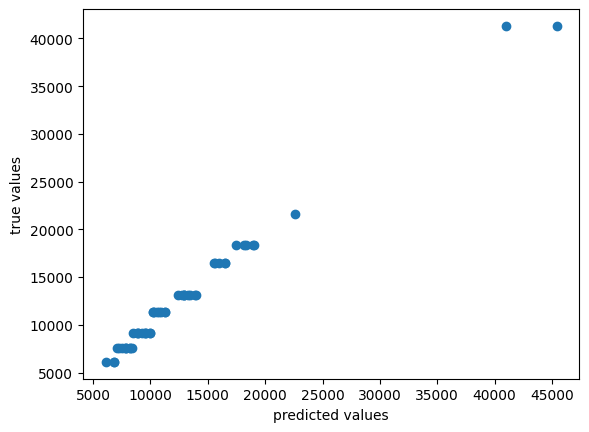

In [ ]:
#mencetak judul "Decision Tree" dan kemudian memanggil fungsi accuracy untuk mengevaluasi kinerja model Decision Tree Regressor.
print("Decision Tree")
accuracy(y_pred_dectree,y_test)